<a href="https://colab.research.google.com/github/karank420/Machine-Learning/blob/main/Gurkaran_Karwal_Lab__4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab #3
First and Last Name: Gurkaran Karwal

Student ID: 500831607

Video URL: No Video Necessary

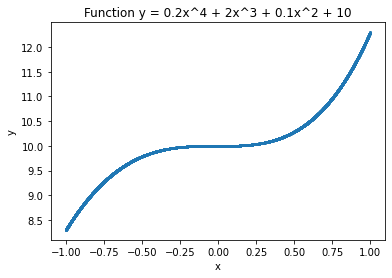

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_samples(n_samples):
    x = np.random.uniform(-1, 1, n_samples)
    y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10
    return x, y

# Generate 30,000 samples
n_samples = 30000
x, y = create_samples(n_samples)

# Plot the function
plt.scatter(x, y, s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function y = 0.2x^4 + 2x^3 + 0.1x^2 + 10')
plt.show()


In [ ]:
import numpy as np

def get_dataset(shuffle=True):
    x = np.random.uniform(-1, 1, 30000)
    y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10
    data = np.vstack((x, y)).T

    if shuffle:
        np.random.shuffle(data)

    return data


In [ ]:
import numpy as np

def split_dataset(data, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    assert train_ratio + val_ratio + test_ratio == 1.0, "Ratios must sum to 1.0"

    n = len(data)
    n_train = int(n * train_ratio)
    n_val = int(n * val_ratio)
    n_test = n - n_train - n_val

    # Shuffle the data
    np.random.shuffle(data)

    # Split the data
    train_data = data[:n_train]
    val_data = data[n_train:n_train+n_val]
    test_data = data[n_train+n_val:]

    return train_data, val_data, test_data


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def scale_data(data):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2


CASE #1

469/469 [==============================] - 1s 1ms/step


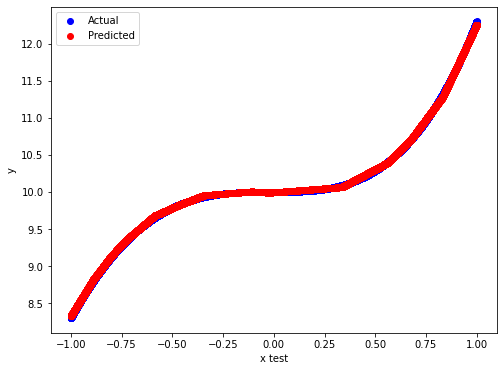

MAE: 0.010078815251347064
MSE: 0.00015457918393815769
RMSE: 0.012432987731762534
R2 Score: 0.9997351486432396


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Generate the data

data = get_dataset(True)

# Shuffle the data


# Split the data into train, validation, and test sets
x_train, x_val, x_test = np.split(data[:, 0], [int(0.3 * len(data)), int(0.5 * len(data))])
y_train, y_val, y_test = np.split(data[:, 1], [int(0.3 * len(data)), int(0.5 * len(data))])

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=12, verbose=0)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.legend()
plt.show()

# Print metrics
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)


CASE#1 NOT SHUFFLED

469/469 [==============================] - 1s 1ms/step


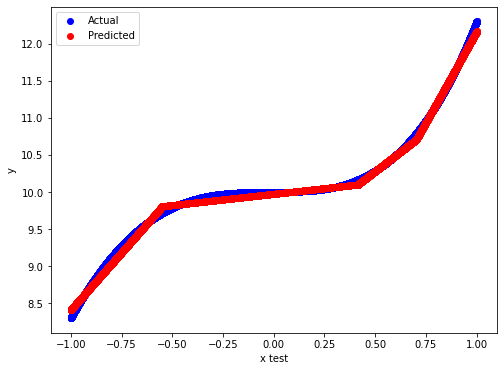

MAE: 0.03943250067131185
MSE: 0.0024306080026165284
RMSE: 0.04930119676657483
R2 Score: 0.9958107081542426


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Generate the data

x, y = create_samples(30000)

data = np.column_stack((x, y))

# Shuffle the data


# Split the data into train, validation, and test sets
x_train, x_val, x_test = np.split(data[:, 0], [int(0.3 * len(data)), int(0.5 * len(data))])
y_train, y_val, y_test = np.split(data[:, 1], [int(0.3 * len(data)), int(0.5 * len(data))])

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=12, verbose=0)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.legend()
plt.show()

# Print metrics
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

CASE#2

469/469 [==============================] - 1s 1ms/step


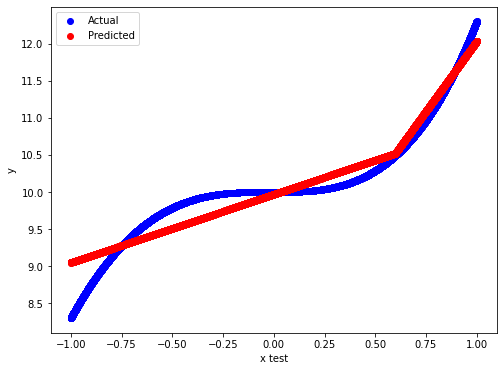

MAE: 0.17328986375643934
MSE: 0.045461871024169084
RMSE: 0.21321789564707996
R2 Score: 0.9206798267234753


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Generate the data
data = get_dataset(True)

# Shuffle the data


# Split the data into train, validation, and test sets
x_train, x_val, x_test = np.split(data[:, 0], [int(0.3 * len(data)), int(0.5 * len(data))])
y_train, y_val, y_test = np.split(data[:, 1], [int(0.3 * len(data)), int(0.5 * len(data))])

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(24, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=12, verbose=0)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.legend()
plt.show()

# Print metrics
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

CASE#2 NOT SHUFFLED

469/469 [==============================] - 1s 1ms/step


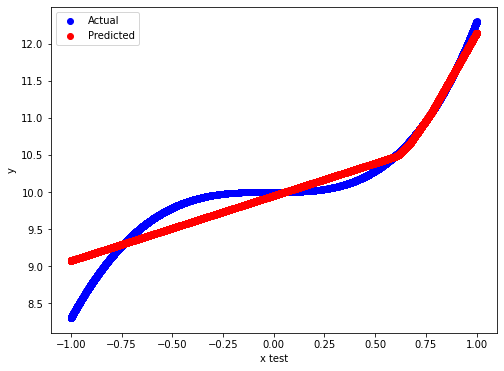

MAE: 0.15248074464185235
MSE: 0.04246811794220361
RMSE: 0.20607794142557717
R2 Score: 0.9255589946848796


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Generate the data
x, y = create_samples(30000)

data = np.column_stack((x, y))

# Shuffle the data


# Split the data into train, validation, and test sets
x_train, x_val, x_test = np.split(data[:, 0], [int(0.3 * len(data)), int(0.5 * len(data))])
y_train, y_val, y_test = np.split(data[:, 1], [int(0.3 * len(data)), int(0.5 * len(data))])

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(24, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=12, verbose=0)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.legend()
plt.show()

# Print metrics
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

CASE#3

469/469 [==============================] - 2s 3ms/step


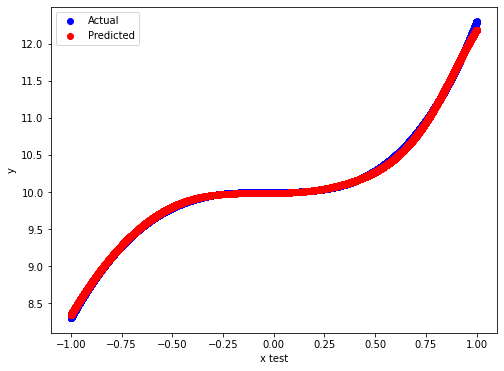

MAE: 0.013334973844262042
MSE: 0.0003345697013290266
RMSE: 0.018291246576683247
R2 Score: 0.9994324958630925


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Generate the data

data = get_dataset(True)

# Shuffle the data


# Split the data into train, validation, and test sets
x_train, x_val, x_test = np.split(data[:, 0], [int(0.3 * len(data)), int(0.5 * len(data))])
y_train, y_val, y_test = np.split(data[:, 1], [int(0.3 * len(data)), int(0.5 * len(data))])

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, input_shape=(1,), activation='tanh'),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=12, verbose=0)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.legend()
plt.show()

# Print metrics
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

CASE#3 NOT SHUFFLED

469/469 [==============================] - 1s 1ms/step


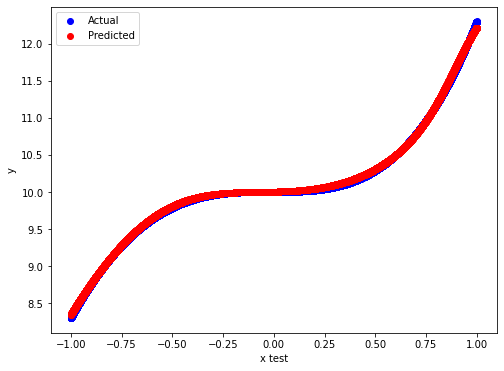

MAE: 0.015490281914686075
MSE: 0.00036715967393088396
RMSE: 0.019161411063146783
R2 Score: 0.9993557132846337


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Generate the data

x, y = create_samples(30000)

data = np.column_stack((x, y))

# Shuffle the data


# Split the data into train, validation, and test sets
x_train, x_val, x_test = np.split(data[:, 0], [int(0.3 * len(data)), int(0.5 * len(data))])
y_train, y_val, y_test = np.split(data[:, 1], [int(0.3 * len(data)), int(0.5 * len(data))])

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, input_shape=(1,), activation='tanh'),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=12, verbose=0)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.legend()
plt.show()

# Print metrics
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

CASE#4

469/469 [==============================] - 1s 1ms/step


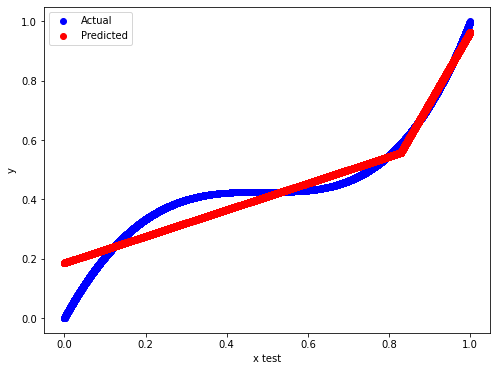

MAE: 0.039249113363847225
MSE: 0.002632902057630803
RMSE: 0.051311812067308664
R2 Score: 0.9264530977341361


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Generate the data

data = get_dataset(True)

sdata = scale_data(data)



# Split the data into train, validation, and test sets
x_train, x_val, x_test = np.split(sdata[:, 0], [int(0.3 * len(sdata)), int(0.5 * len(sdata))])
y_train, y_val, y_test = np.split(sdata[:, 1], [int(0.3 * len(sdata)), int(0.5 * len(sdata))])

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=12, verbose=0)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.legend()
plt.show()

# Print metrics
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

CASE#4 NOT SHUFFLED

469/469 [==============================] - 1s 2ms/step


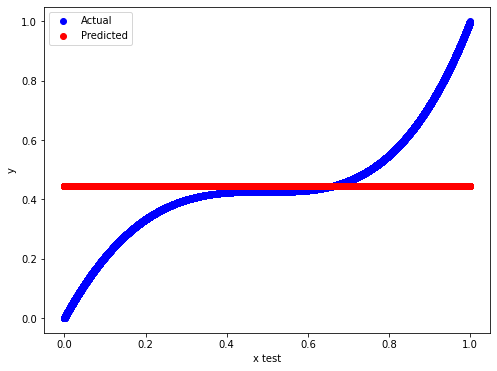

MAE: 0.12973127582380742
MSE: 0.036106451343137565
RMSE: 0.19001697646036148
R2 Score: -3.4463159513276054e-05


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Generate the data

x, y = create_samples(30000)

data = np.column_stack((x, y))

sdata = scale_data(data)



# Split the data into train, validation, and test sets
x_train, x_val, x_test = np.split(sdata[:, 0], [int(0.3 * len(sdata)), int(0.5 * len(sdata))])
y_train, y_val, y_test = np.split(sdata[:, 1], [int(0.3 * len(sdata)), int(0.5 * len(sdata))])

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=12, verbose=0)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.legend()
plt.show()

# Print metrics
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

CASE#5

469/469 [==============================] - 1s 2ms/step


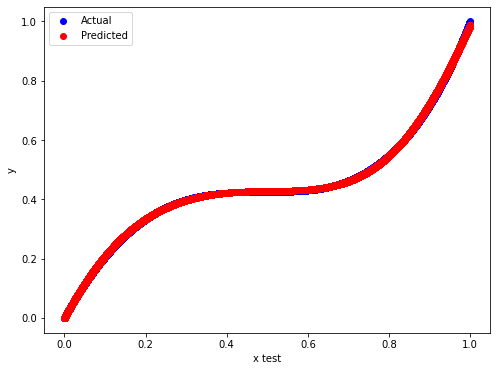

MAE: 0.0019170645674928596
MSE: 5.772637092724101e-06
RMSE: 0.0024026312852212886
R2 Score: 0.9998352587544962


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Generate the data

data = get_dataset(True)

sdata = scale_data(data)



# Split the data into train, validation, and test sets
x_train, x_val, x_test = np.split(sdata[:, 0], [int(0.3 * len(sdata)), int(0.5 * len(sdata))])
y_train, y_val, y_test = np.split(sdata[:, 1], [int(0.3 * len(sdata)), int(0.5 * len(sdata))])

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, input_shape=(1,), activation='tanh'),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=12, verbose=0)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.legend()
plt.show()

# Print metrics
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

CASE#5 NOT SHUFFLED

469/469 [==============================] - 1s 1ms/step


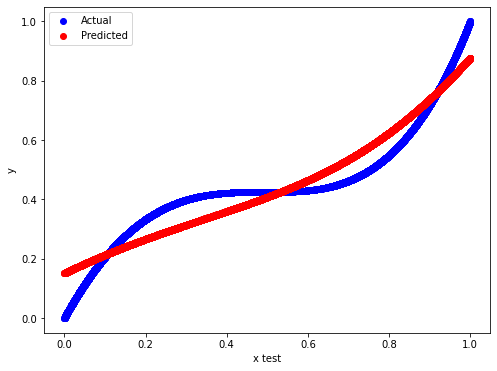

MAE: 0.0551993590271096
MSE: 0.0038805974712478493
RMSE: 0.06229444173638487
R2 Score: 0.8895069817973426


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Generate the data

x, y = create_samples(30000)

data = np.column_stack((x, y))

sdata = scale_data(data)



# Split the data into train, validation, and test sets
x_train, x_val, x_test = np.split(sdata[:, 0], [int(0.3 * len(sdata)), int(0.5 * len(sdata))])
y_train, y_val, y_test = np.split(sdata[:, 1], [int(0.3 * len(sdata)), int(0.5 * len(sdata))])

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, input_shape=(1,), activation='tanh'),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=12, verbose=0)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('x test')
plt.ylabel('y')
plt.legend()
plt.show()

# Print metrics
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)